###  Enhancing Risk Management Strategy: Calculating Value at Risk for East Africa Portland Cement using Historical Data from The Wall Street Journal
#### Business Understanding:

East Africa Portland Cement Company (EAPCC) is a leading cement manufacturing company operating in the East African region. As with any business operating in the financial markets, EAPCC is exposed to various risks, including market risk. Market risk refers to the potential losses that a company may incur due to adverse movements in financial markets, such as changes in interest rates, exchange rates, or commodity prices.

#### Problem Statement:

The calculation of Value at Risk (VaR) is a critical component of EAPCC's risk management strategy. VaR is a statistical measure that quantifies the potential loss in the value of a portfolio or asset over a specific time horizon, at a given confidence level. By calculating VaR, EAPCC can assess the potential downside risk associated with its financial investments and take proactive measures to mitigate these risks.

<b>Expound</b>:

The data obtained from The Wall Street Journal (WSJ) provides historical price information for East Africa Portland Cement Company's stock or related financial instruments. This data typically includes daily opening, high, low, and closing prices, as well as percentage returns (Pct_return) for each trading day.

## Data Understanding

In [2]:
import  pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import numpy as np

In [3]:
#loading the data set
data = pd.read_csv("Historicalprices.csv")

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume
0,03/14/24,8.5,8.5,8.5,8.50,100
1,03/13/24,8.5,8.5,8.1,8.14,1200
2,02/28/24,9.0,9.0,9.0,9.00,100
3,02/22/24,9.0,9.0,9.0,9.00,100
4,02/21/24,9.4,9.4,9.4,9.40,100


In [5]:
# understanding the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     846 non-null    object 
 1    Open    846 non-null    float64
 2    High    846 non-null    float64
 3    Low     846 non-null    float64
 4    Close   846 non-null    float64
 5    Volume  846 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 39.8+ KB


##### The dataset has five columns  
<p> 1. Date: The date the stock were being traded <p> 2. Open : The opening price of the stock <p> 3. High : The highest price the stock  was traded during that particular day <p> 4. Low : The lowest the stock was traded during that partucular day <p> 5. Close : The closing price of the stock. <p> 6. Volume : The number of trade done on that day

In [6]:
from tabulate import tabulate

# Checking the data shape, data types, missing values, and duplicates
summary = pd.DataFrame({
    'Data Shape': [data.shape],
    'Data Types': [data.dtypes],
    'Missing Values': [data.isnull().sum()],
    'Duplicates': [data.duplicated().sum()]
})

print(tabulate(summary, headers='keys', tablefmt='pretty'))


+---+------------+--------------------+----------------+------------+
|   | Data Shape |     Data Types     | Missing Values | Duplicates |
+---+------------+--------------------+----------------+------------+
| 0 |  (846, 6)  | Date        object |  Date       0  |     0      |
|   |            |  Open      float64 |   Open      0  |            |
|   |            |  High      float64 |   High      0  |            |
|   |            |  Low       float64 |   Low       0  |            |
|   |            |  Close     float64 |   Close     0  |            |
|   |            |  Volume      int64 |   Volume    0  |            |
|   |            |   dtype: object    |  dtype: int64  |            |
+---+------------+--------------------+----------------+------------+


The data has 846 observations and 6 columns. <p> There are no missing values in the data <p>There are no missing values in the data. <p> There are no dulicates in the data

In [7]:
# statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,846.0,13.806359,7.700858,5.38,7.50,9.50,19.0,35.0
High,846.0,13.882636,7.751544,5.40,7.57,9.52,19.0,35.0
Low,846.0,13.727376,7.696750,5.14,7.50,9.50,19.0,35.0
Close,846.0,13.787187,7.714595,5.32,7.50,9.50,19.0,35.0
Volume,846.0,1689.361702,8486.467073,100.00,100.00,400.00,1200.0,215800.0


#### Data Preperation

In [8]:
data.head()

,Date,Open,High,Low,Close,Volume
0,03/14/24,8.5,8.5,8.5,8.50,100
1,03/13/24,8.5,8.5,8.1,8.14,1200
2,02/28/24,9.0,9.0,9.0,9.00,100
3,02/22/24,9.0,9.0,9.0,9.00,100
4,02/21/24,9.4,9.4,9.4,9.40,100


In [15]:
#Making the date column  the index
data.Date=  pd.to_datetime(data.Date, format = "%d-%m-%y")
indexed_data = data.set_index("Date", drop = True, append = False)
indexed_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-14,8.5,8.5,8.5,8.50,100
2024-03-13,8.5,8.5,8.1,8.14,1200
2024-02-28,9.0,9.0,9.0,9.00,100
2024-02-22,9.0,9.0,9.0,9.00,100
2024-02-21,9.4,9.4,9.4,9.40,100


In [16]:
indexed_data.columns = ["Open","High","Low","Close","Volume"]
indexed_data.drop("Volume",axis=1,inplace= True)

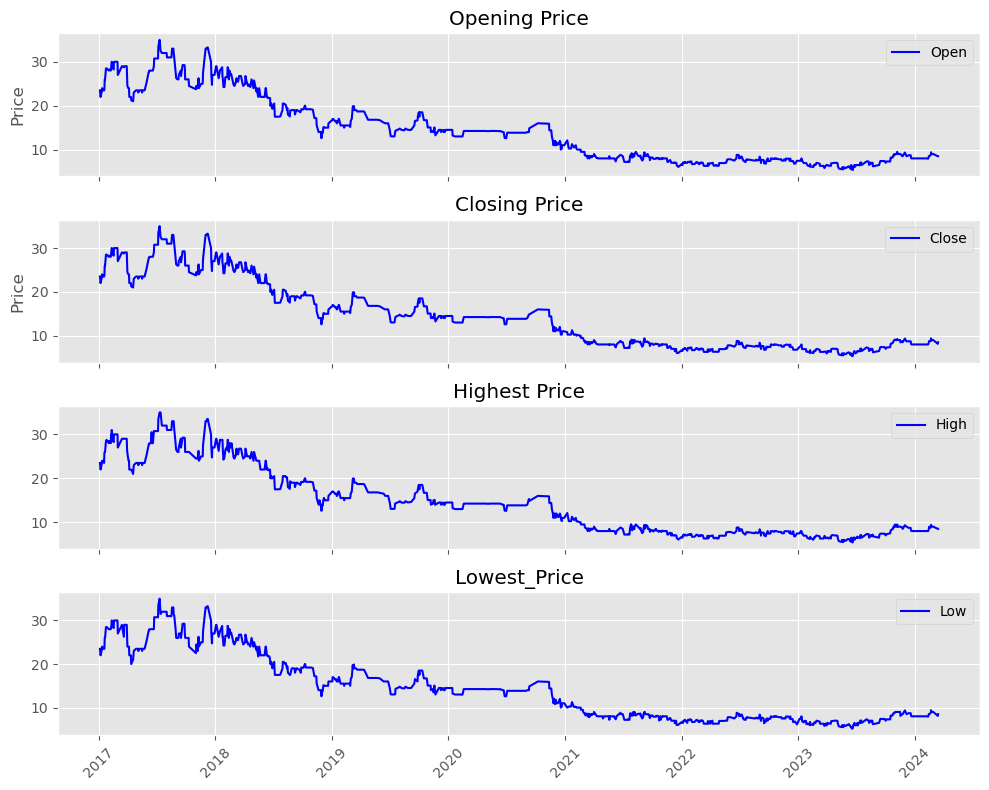

In [17]:
fig, axs = plt.subplots(4, sharex=True, figsize=(10, 8))
plt.style.use("ggplot")

# Plotting Open, High, Low, and Close prices
axs[0].plot(indexed_data.index, indexed_data['Open'], color='blue', label='Open')
axs[1].plot(indexed_data.index, indexed_data['Close'], color='blue', label='Close')
axs[0].set_ylabel('Price')
axs[0].legend()
axs[1].legend()

axs[2].plot(indexed_data.index, indexed_data['High'], color='blue', label='High')
axs[3].plot(indexed_data.index, indexed_data['Low'], color='blue', label='Low')
axs[1].set_ylabel('Price')
axs[2].legend()
axs[3].legend()

# Adding titles
axs[0].set_title("Opening Price")
axs[1].set_title("Closing Price")
axs[2].set_title("Highest Price")
axs[3].set_title("Lowest_Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


From the plots the prices have been decreasing over time. <br> Thisd indicate the performance of the company has been deteorarating over time. This might be attributed to various factors such as:<p> 1.Poor management since the demand of cement has been increasing over time due to the growth of real estate sector. The company as vast land of land  which has limestone deposit.<p>2. Competation . Since the company is at near proximity with various companies producing the same products.<p> 3. Political interferance . Since the company is a parastatal there is high probability there is political interferance when it comes to eployment and granting of tenders

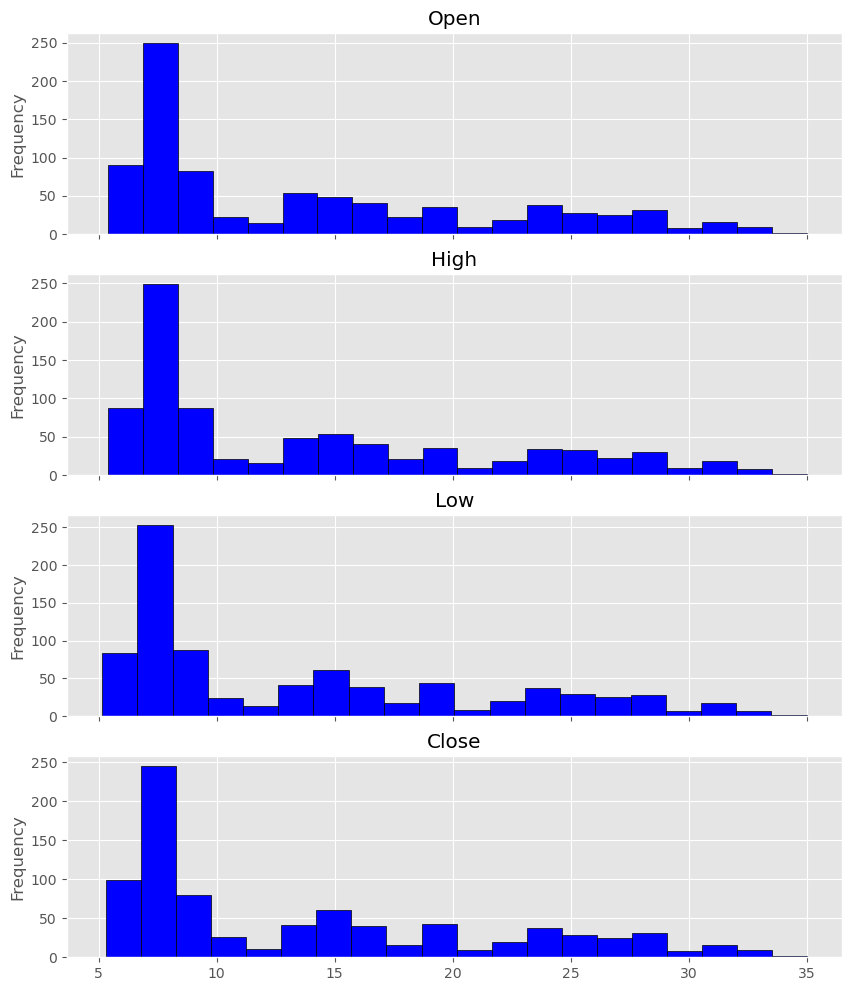

In [18]:

fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot histograms for each column in its respective subplot
for i, col in enumerate(indexed_data.columns):
    axs[i].hist(indexed_data[col], bins=20, color='blue', edgecolor='black')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(col)


from the stock price we can conclude tha its normally distributed but extremly right skewed

#### Value at risk 

<b><i>Historical Method</i><b>

In [27]:
returns = indexed_data["Close"].pct_change()
indexed_data["Pct_return"] = returns
indexed_data.dropna(inplace=True)pl
indexed_data

,Open,High,Low,Close,Pct_return
Date,,,,,
2024-03-13,8.50,8.50,8.10,8.14,-0.042353
2024-02-28,9.00,9.00,9.00,9.00,0.105651
2024-02-22,9.00,9.00,9.00,9.00,0.000000
2024-02-21,9.40,9.40,9.40,9.40,0.044444
2024-02-20,8.76,8.76,8.76,8.76,-0.068085
...,...,...,...,...,...
2017-01-11,24.00,24.00,24.00,24.00,0.021277
2017-01-10,23.25,23.50,23.25,23.25,-0.031250
2017-01-09,23.00,23.00,23.00,23.00,-0.010753


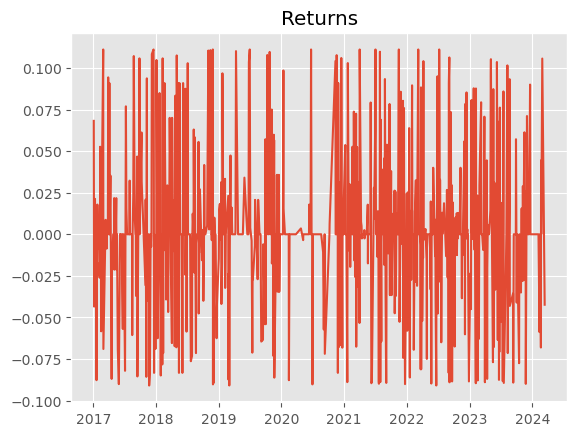

In [41]:
plt.plot(indexed_data["Pct_return"])
plt.title("Returns")
plt.show()

In [38]:
historic_var = np.percentile(indexed_data["Pct_return"].values, 5, method ="lower")
print(f'The simple historical VaR is {historic_var}')

The simple historical VaR is -0.08333333333333337


The value at risk using historical method indicates that there is likelihood of not making a loss thus showing profitability, <b> But if we check our line plot in returns stronger loss from 2021 to 2024. The negative reurns seems to have surpased positive in most instances. We need to re_evaluate th data again from 2021 to 2024.</b>

In [46]:
# indexing the data from 2021 to 2024
indexed_data.sort_index(inplace=True)
indexed = indexed_data['2021-01-01':'2024-12-31']

In [44]:
indexed

,Open,High,Low,Close,Pct_return
Date,,,,,
2021-01-07,12.10,12.10,10.00,10.80,0.053659
2021-01-08,11.85,11.85,10.00,10.25,0.000000
2021-01-12,10.25,10.25,10.25,10.25,0.000000
2021-01-13,10.25,10.25,10.25,10.25,0.000000
2021-01-14,10.25,10.25,10.25,10.25,0.000000
...,...,...,...,...,...
2024-02-20,8.76,8.76,8.76,8.76,-0.068085
2024-02-21,9.40,9.40,9.40,9.40,0.044444
2024-02-22,9.00,9.00,9.00,9.00,0.000000


In [45]:
# calculaton of value at risk
historic_var = np.percentile(indexed["Pct_return"].values, 5, method ="lower")
print(f'The simple historical VaR is {historic_var}')

The simple historical VaR is -0.08754208754208759


With the re_evaluation of the data set there is minimal chances of making a loss <b> That is the is a minimal probability of making a loss. </b> But this does not indicate profitability.<b><i> This can be illustrated using a histogram </i><b>

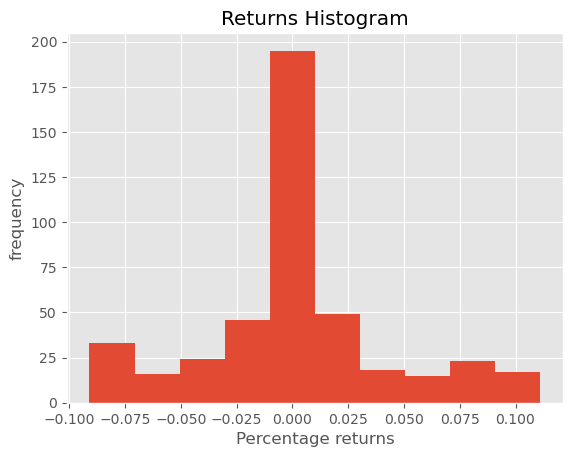

In [54]:
# percentage return histogram
plt.hist(indexed["Pct_return"])
plt.title("Returns Histogram")
plt.ylabel("frequency")
plt.xlabel("Percentage returns")
plt.show()


In [63]:
# Separate positive, negative, and zero values
positive_values = indexed[indexed['Pct_return'] > 0]
negative_values = indexed[indexed['Pct_return'] < 0]
zero_values = indexed[indexed['Pct_return'] == 0]



# Count the frequencies of each group
positive_frequency = len(positive_values)
negative_frequency = len(negative_values)
zero_frequency = len(zero_values)

In [65]:
print(positive_frequency,
negative_frequency, 
zero_frequency) 

149 143 144


In [75]:
#probability of positive returns
total = positive_frequency+negative_frequency+zero_frequency
loss_probability = negative_frequency/total
no_return_probability = zero_frequency/total
profit_probability = positive_frequency/total
no_loss_probability = (zero_frequency + positive_frequency)/total

In [79]:
probability_table = pd.DataFrame({
    'Category': ['Loss', 'No Return', 'Profit', 'No Loss'],
    'Frequency': [negative_frequency, zero_frequency, positive_frequency,(zero_frequency + positive_frequency)],
    'Probability': [loss_probability, no_return_probability, profit_probability, no_loss_probability]
})

In [80]:
probability_table

,Category,Frequency,Probability
0,Loss,143,0.327982
1,No Return,144,0.330275
2,Profit,149,0.341743
3,No Loss,293,0.672018


### Interpretation and Conclusion:

1. **Historical Value at Risk (VaR) Analysis**: 
   - The historical method of calculating VaR for East Africa Portland Cement Company's stock returns indicates a minimal likelihood of making a loss over the specified time period (2021 to 2024).
   - The calculated VaR value (-0.0875) suggests that there is a 5% probability that the stock returns could fall below this threshold, indicating a potential downside risk.
   - However, it's important to note that while the VaR value is negative, indicating potential losses, the analysis doesn't necessarily indicate profitability. Further evaluation of the data is required to assess overall profitability.

2. **Probability Distribution of Returns**:
   - The histogram of percentage returns illustrates the distribution of returns over the specified time period.
   - The majority of returns fall within the range of positive and negative values, indicating variability in stock performance.
   - The distribution appears to be approximately symmetric, with a slight right skewness, suggesting that while there are instances of positive returns, there are also periods of negative returns.

3. **Probability Analysis**:
   - Based on the frequency table of returns, approximately 34% of the observed returns are categorized as profit, 33% as no return, and 33% as loss.
   - This analysis indicates a relatively balanced distribution of returns, with a slight skew towards profitability.

4. **Business Implications**:
   - The analysis suggests that while there are risks associated with investing in East Africa Portland Cement Company's stock, there are also opportunities for profitability.
   - EAPCC should continue to monitor market conditions closely and implement risk management strategies to mitigate potential losses and capitalize on profitable opportunities.
   - Further analysis, including stress testing and scenario analysis, may provide additional insights into the potential impact of extreme market events on the company's financial performance.

5. **Conclusion**:
   - In conclusion, the analysis highlights the importance of understanding and managing market risk for East Africa Portland Cement Company.
   - While the historical VaR analysis suggests a minimal likelihood of making a loss, it's essential for the company to adopt a proactive approach to risk management and continuously assess its investment strategies.
   - By leveraging historical data and robust risk management practices, EAPCC can navigate market uncertainties more effectively and optimize its investment performance over time.